## Train a logistic regression classifier to predict survival of passengers in titanic dataset

In [ ]:
from IPython.display import clear_output

In [ ]:
#Don't change this code

%pip install gdown==4.5

clear_output()

In [ ]:
!gdown 18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK  # Download the csv file.

Downloading...
From: https://drive.google.com/uc?id=18YfCgT3Rk7uYWrUzgjb2UR3Nyo9Z68bK
To: /content/titanic.csv
100% 60.3k/60.3k [00:00<00:00, 61.3MB/s]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder



In [ ]:
titanic_data = titanic_data.dropna()
titanic_data = pd.read_csv('titanic.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived'])

In [ ]:
data_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_x = data_x.drop(['Sex'], axis = 1)
data_x = data_x.drop(['Embarked'], axis = 1)
data_x = data_x.drop(['Ticket'], axis = 1)
data_x = data_x.drop(['Cabin'], axis = 1)
data_x = data_x.drop(['Name'], axis = 1)
data_x = data_x.drop(['SibSp'], axis = 1)
data_x = data_x.drop(['Parch'], axis = 1)


In [ ]:
data_x.loc[titanic_data.Sex == 'male','Sex'] = 0
data_x.loc[titanic_data.Sex == 'female', 'Sex'] = 1

data_x.loc[titanic_data.Embarked == 'S', 'Embarked'] = 0
data_x.loc[titanic_data.Embarked == 'C', 'Embarked'] = 1
data_x.loc[titanic_data.Embarked == 'Q', 'Embarked'] = 2


In [ ]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data= pd.DataFrame(titanic_data.values)

In [ ]:
titanic_data.info

<bound method DataFrame.info of       0  1  2                                                  3       4   \
0      1  0  3                            Braund, Mr. Owen Harris    male   
1      2  1  1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
2      3  1  3                             Heikkinen, Miss. Laina  female   
3      4  1  1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4      5  0  3                           Allen, Mr. William Henry    male   
..   ... .. ..                                                ...     ...   
886  887  0  2                              Montvila, Rev. Juozas    male   
887  888  1  1                       Graham, Miss. Margaret Edith  female   
888  889  0  3           Johnston, Miss. Catherine Helen "Carrie"  female   
889  890  1  1                              Behr, Mr. Karl Howell    male   
890  891  0  3                                Dooley, Mr. Patrick    male   

       5  6  7                 8        9  

In [ ]:
titanic_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S


In [ ]:
data_x = np.hstack((np.ones((data_x.shape[0], 1)), data_x))

In [ ]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

def loss(yhat, y):
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [ ]:
theta = np.random.randn(x_train.shape[1])

<ipython-input-1042-6af31a78d451>:5: RuntimeWarning: divide by zero encountered in log
  return np.sum(-y*np.log(yhat) - (1-y)*np.log(1-yhat))


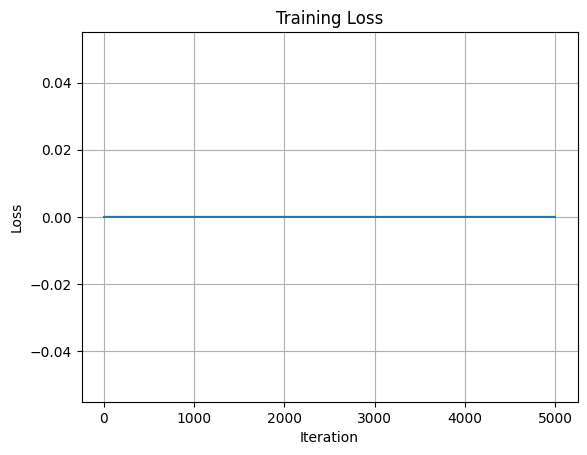

In [ ]:
ls = []
lr = 0.001
for i in range(5000):
    # Loss
    yhat = sigmoid(x_train @ theta)
    l = loss(yhat, y_train)
    ls.append(l)


    grad = x_train.T @ (yhat - y_train)
    theta -= lr * grad

plt.figure()
plt.plot(ls)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.grid(True)
plt.show()

In [ ]:
y_test_pred = sigmoid(x_test @ theta)
prediction = (y_test_pred >= 0.5)
accuracy = np.sum((prediction == y_test)) / len(y_test)
print('Accuracy:', accuracy * 100, '%')

Accuracy: 58.659217877094974 %
